In [2]:
import json
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import copy
from utils.utils import *

In [3]:
method_dict = {"MC": "Random Sample","random sample": "Random Sample", "surr ensemble": "ASE Class Score 0", "ASE": "ASE Class Score 0", "ASE_regression": "ASE Regression Score 0", 
               "ASE_all": "ASE All Score 0", "ASE_class_score_1": "ASE Class Score -1", "ASE_reg_score_1": "ASE Regression Score -1", "ASE_all_score_1": "ASE All Score -1", "MPL": "MPL"}
metric_dict = {'loss': 'Loss', 'mAP': 'mAP', "mAR_1000": "mAR"}
def add_entries(file):
    #columns=['active_test_type','sample_size','loss','mAP',"AP_50", "AP_75", "mAP_samll", "mAP_medium", "mAP_large", "mAR_1", "mAR_10", "mAR_1000", "mAR_small", "mAR_medium", "mAR_large"]
    with open(file, 'r') as openfile:
        json_object = json.load(openfile)
    df = None
    for key,value in json_object.items():
        if 'test_stats' in value.keys():
            del value['test_stats']
        value['active_test_type'] = method_dict[value['active_test_type']]
        # if value['sample_size'] < 180:
        #     continue
        temp_df = pd.DataFrame(value, index=[key])
        if df is None:
            df = temp_df
        else:
            df = df.append(temp_df,ignore_index=True)
    return df

In [4]:
def plot_figure(data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.plot([data['sample_size'][0], data['sample_size'][len(data['sample_size'])-1]], [baseline_data[y_metric], baseline_data[y_metric]], lw=3, label="Whole Data Set")
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_all_diff_precentage_figure(input_data, baseline_data, sample_nums, y_metric, x_label_name = "% of Acquired Images"):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric] * 100
    data['sample_size'] = data['sample_size'] / sample_nums * 100
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
        
    x_line = [data['sample_size'][0], data['sample_size'][data['sample_size'].shape[0]-1]]
    y_line = [0, 0]
    plt.plot(x_line, y_line, 'r')
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel("% Difference Rate to Full Test " + metric_dict[y_metric], fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()

def plot_diff_figure(input_data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = add_entries(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " diff", fontsize=font_size)# y轴标签
    # pic_name = scenario+'.png'
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    #plt.ylim(-1600,-800)
    #plt.savefig(pic_name,dpi=800)
    plt.show()
    
def plot_diff_precentage_figure(data_path, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = add_entries(data_path)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()
    
def plot_diff_precentage_figure_comp(input_data, baseline_data, y_metric, x_label_name = "# of Acquired Images"):
    data = copy.deepcopy(input_data)
    f = plt.figure(figsize=(10, 8))
    font_size = 25
    data[y_metric] -= baseline_data[y_metric]
    data[y_metric] = data[y_metric] / baseline_data[y_metric]
    with sns.axes_style("darkgrid"):
        sns.lineplot(data=data, \
                     x='sample_size', y=y_metric, \
                     hue='active_test_type', errorbar=('ci', 100), lw=3)
    plt.title("Active Testing", fontsize=30)
    plt.xlabel(x_label_name, fontsize=font_size)# x轴标签
    plt.ylabel(metric_dict[y_metric] + " Diff %", fontsize=font_size)# y轴标签
    plt.legend(fontsize = 18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.tight_layout()
    plt.show()

def read_baseline_data(data_path):
    with open(data_path, 'r') as openfile:
        none_swin_data = json.load(openfile)
    return none_swin_data["0"]

## Image based

In [37]:
# PSPNet_VOC, UNet_COCO10k, UNet_VOC, DeepLab_VOC, FCN_VOC, SEGNet_VOC,
method_dict = {"random sample": "Random Sample", "ViT all": "ViT", "ASE":"ASE"}
def show_image_results(model_dataset, steps = 10000):
    base_path = f"./pro_data/{model_dataset}/val/"
    sample_size_threshold = np_read(base_path + "image_true_losses.npy").shape[0]
    result_json_path = f"./results/{model_dataset}/image_based_active_testing/"
    true_loss_estimation_path = result_json_path + "None.json"
    test_whole_data = read_baseline_data(true_loss_estimation_path)
    results = add_entries(result_json_path + "random_sample_3_runs.json")
    # results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
    results =  results.append(add_entries(result_json_path + f"ViT_all_runs_{steps}.json"),ignore_index=True)
    plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

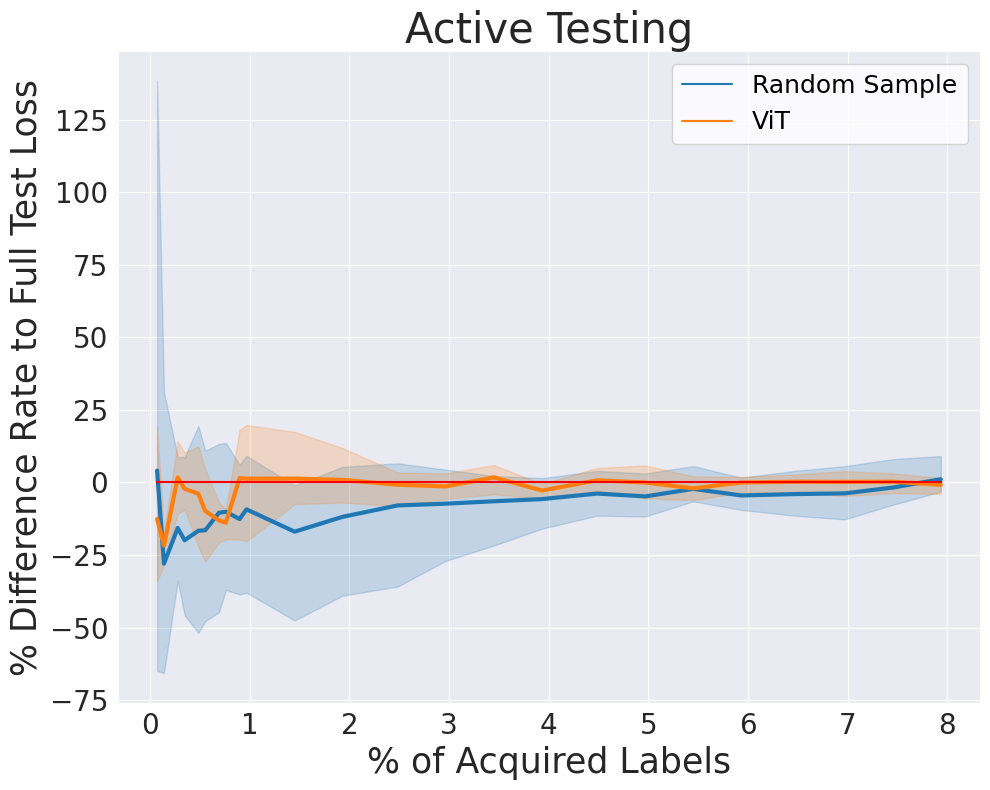

In [38]:
show_image_results("UNet_VOC", 10000)

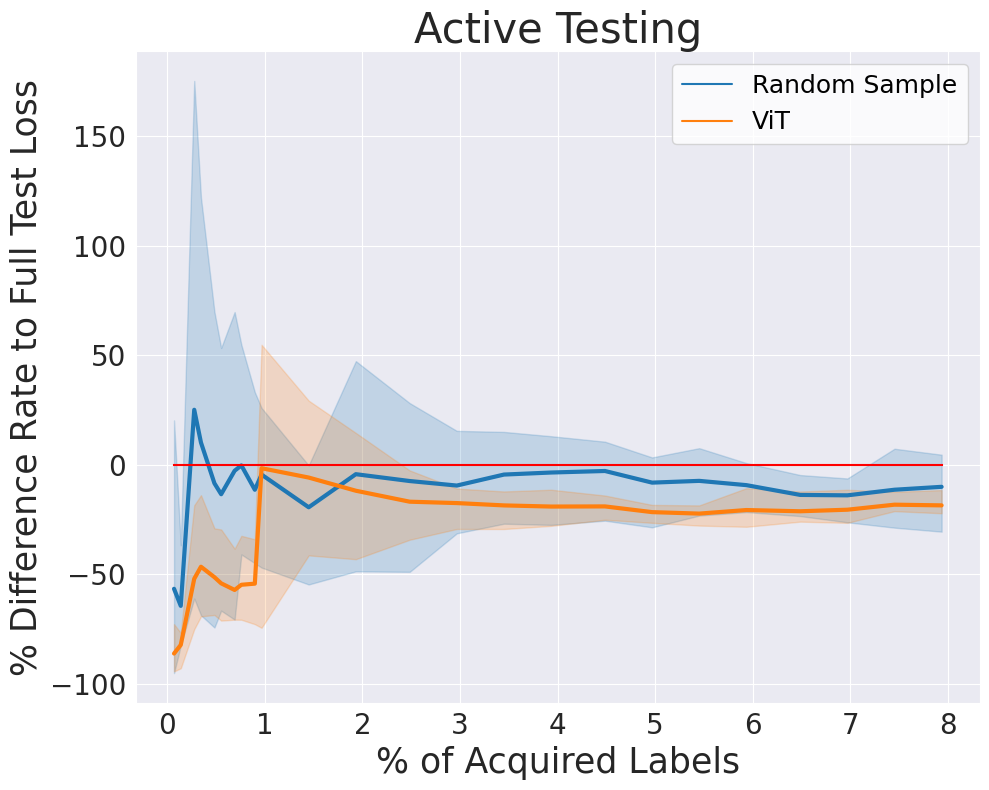

In [56]:
show_image_results("DeepLab_VOC", 20000)

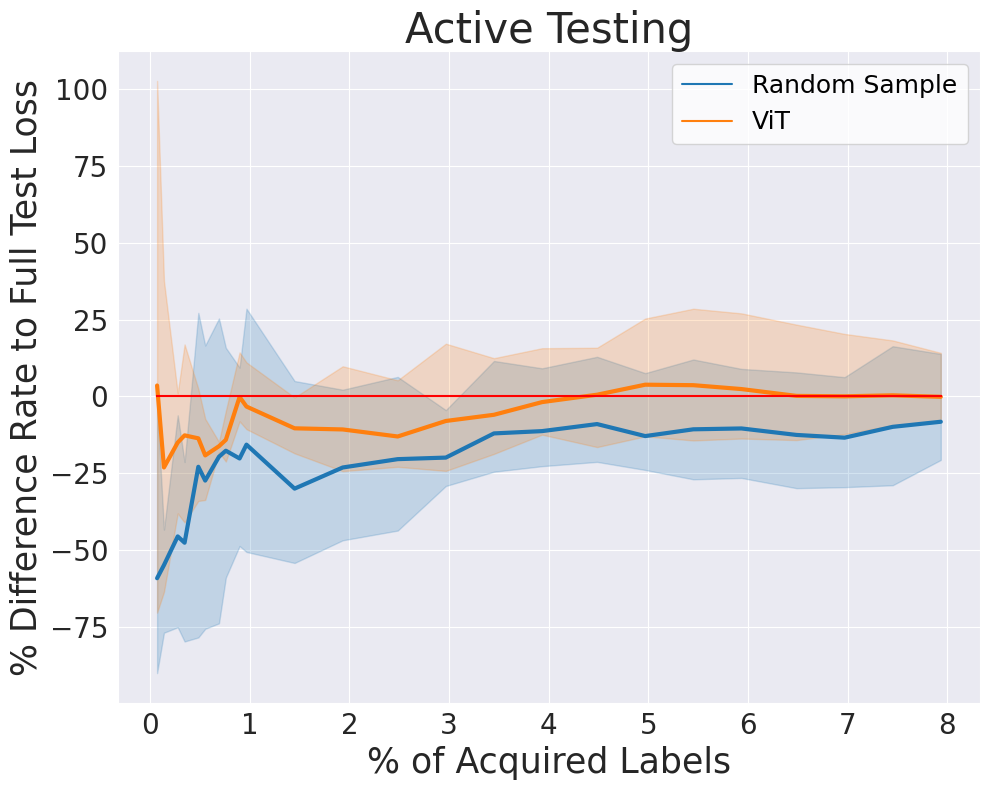

In [44]:
show_image_results("FCN_VOC", 20000)

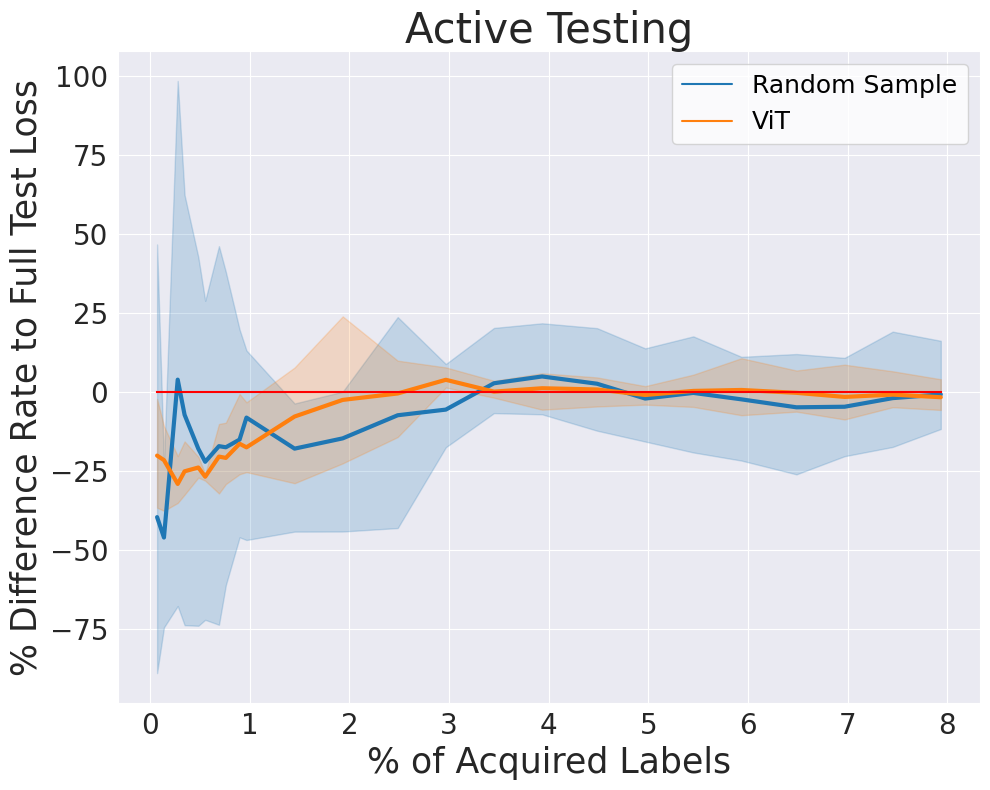

In [50]:
show_image_results("SEGNet_VOC", 5000)

## 16x16 Region based

In [58]:
## 16x16 based
method_dict = {"random sample": "Random Sample", "ViT region": "ViT", "ASE": "ASE"}
def show_region_16_results(model_dataset, steps = 10000):
    base_path = f"./pro_data/{model_dataset}/val/"
    sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
    result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
    true_loss_estimation_path = result_json_path + "None.json"
    test_whole_data = read_baseline_data(true_loss_estimation_path)
    results = add_entries(result_json_path + "random_sample_3_runs.json")
    # results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
    # results =  results.append(add_entries(result_json_path + "ViT_range_region_runs_10000.json"),ignore_index=True)
    results =  results.append(add_entries(result_json_path + f"ViT_region_runs_{steps}.json"),ignore_index=True)
    plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

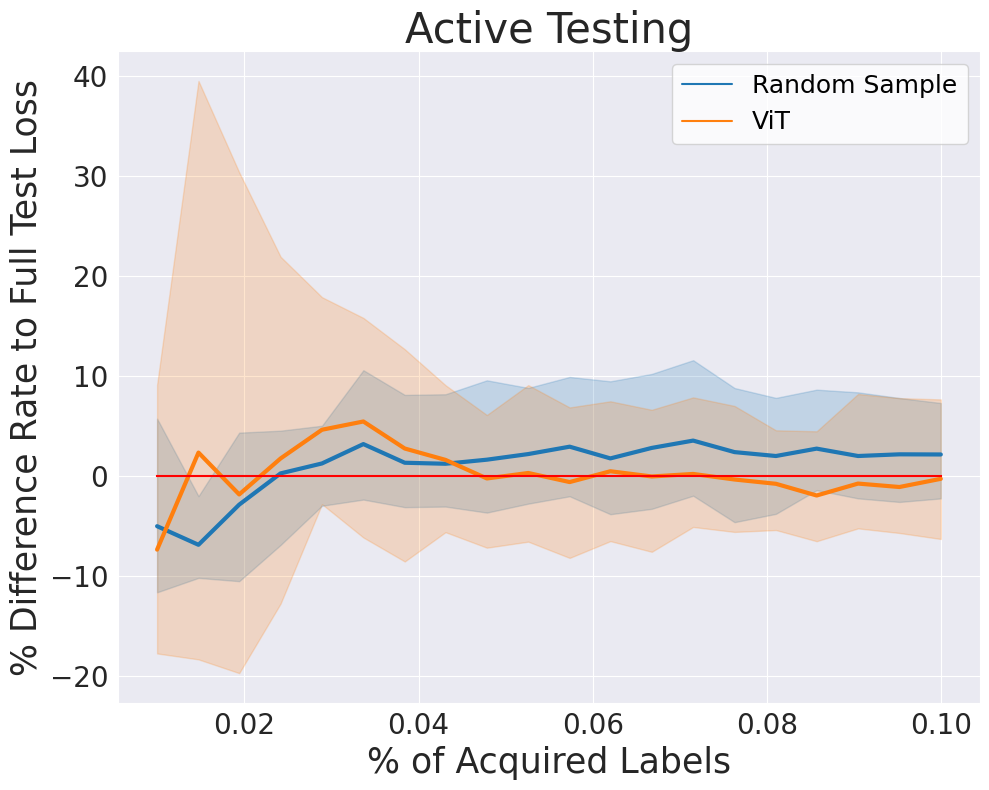

In [72]:
show_region_16_results("UNet_VOC", 10000)

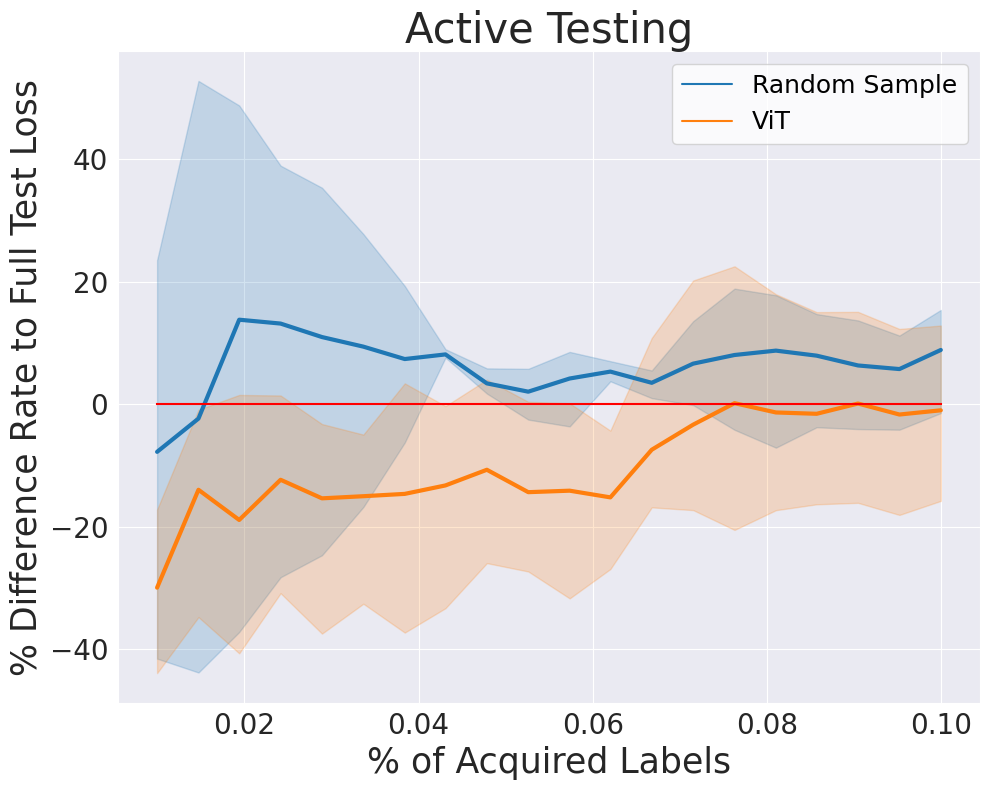

In [62]:
show_region_16_results("DeepLab_VOC", 5000)

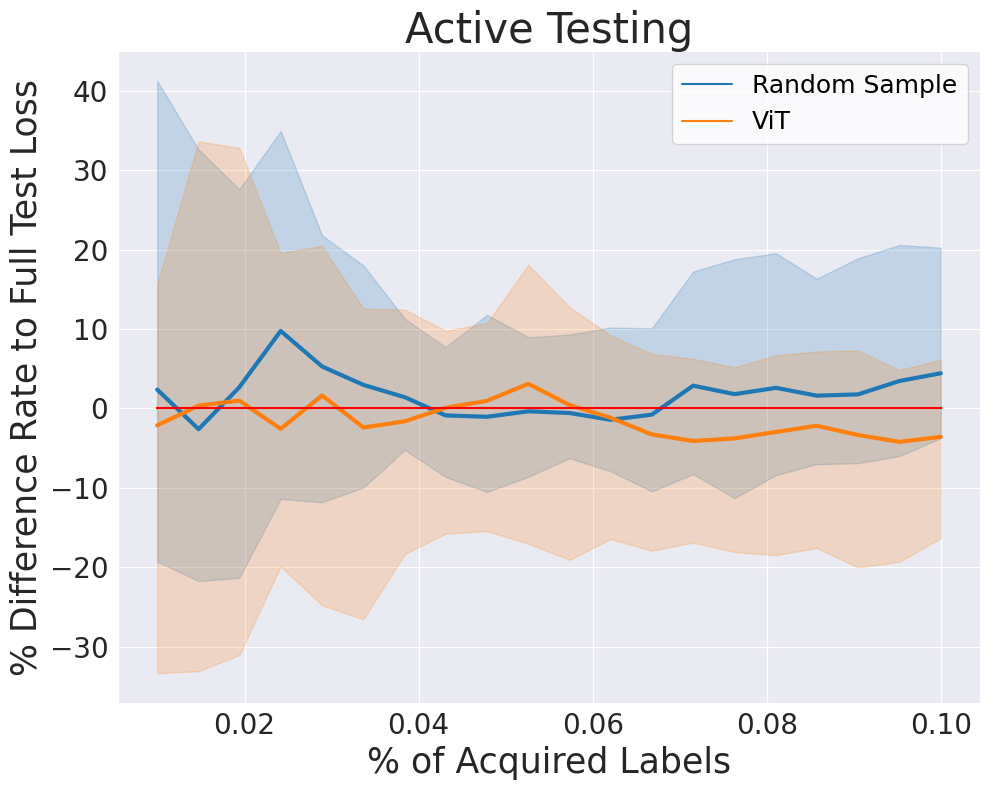

In [70]:
show_region_16_results("FCN_VOC", 15000)

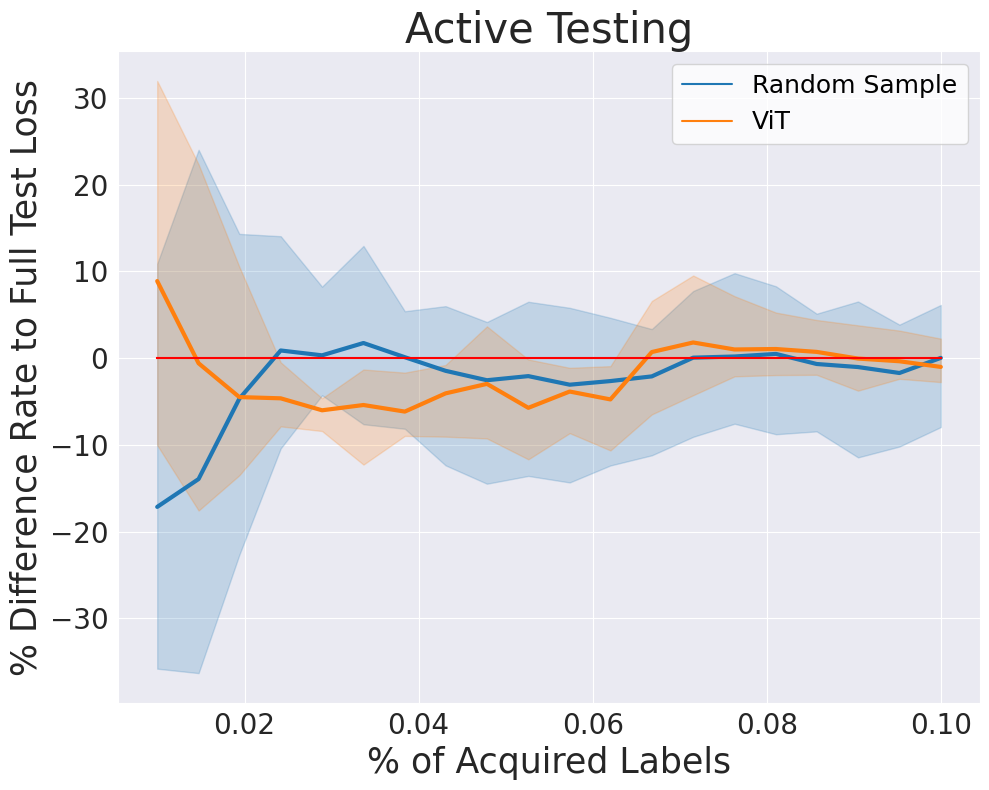

In [77]:
show_region_16_results("SEGNet_VOC", 5000)

## 32x32 Region based

In [78]:
method_dict = {"random sample": "Random Sample", "ViT region": "ViT", "ASE": "ASE"}
def show_region_32_results(model_dataset, steps = 10000):
    base_path = f"./pro_data/{model_dataset}/val/"
    sample_size_threshold = np_read(base_path + "region_32_32_true_losses.npy").shape[0]
    result_json_path = f"./results/{model_dataset}/region_32_32_active_testing/"
    true_loss_estimation_path = result_json_path + "None.json"
    test_whole_data = read_baseline_data(true_loss_estimation_path)
    results = add_entries(result_json_path + "random_sample_3_runs.json")
    # results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
    results =  results.append(add_entries(result_json_path + f"ViT_region_runs_{steps}.json"),ignore_index=True)
    plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

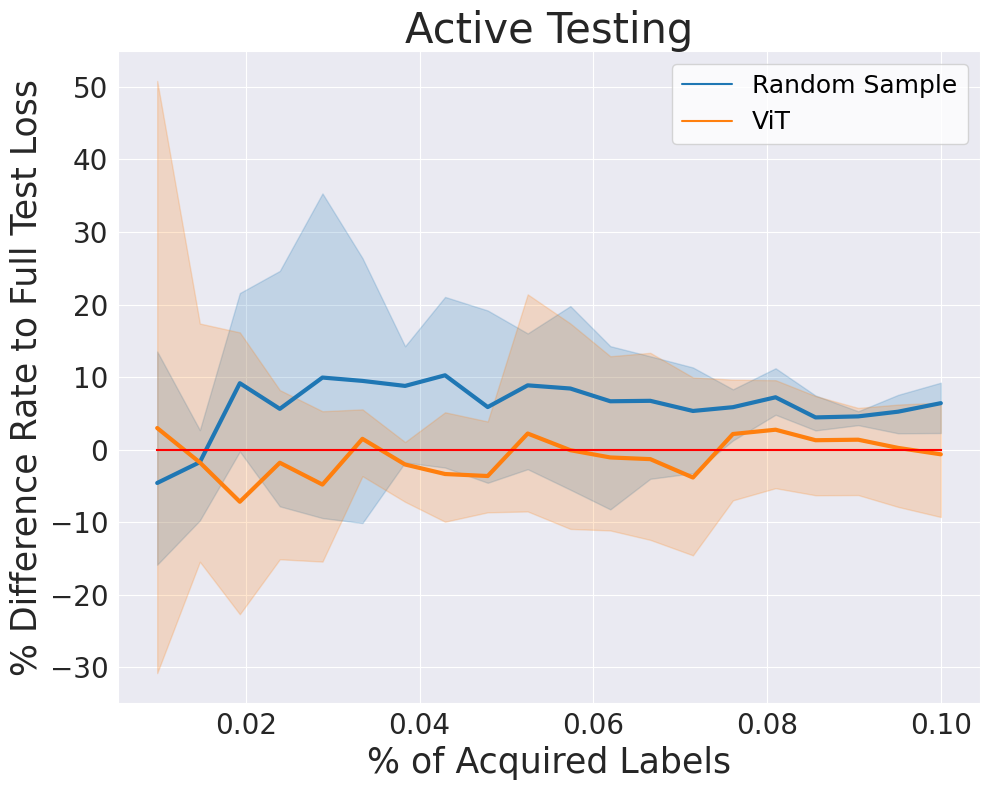

In [85]:
show_region_32_results("UNet_VOC", 5000)

## 8x8 Region based

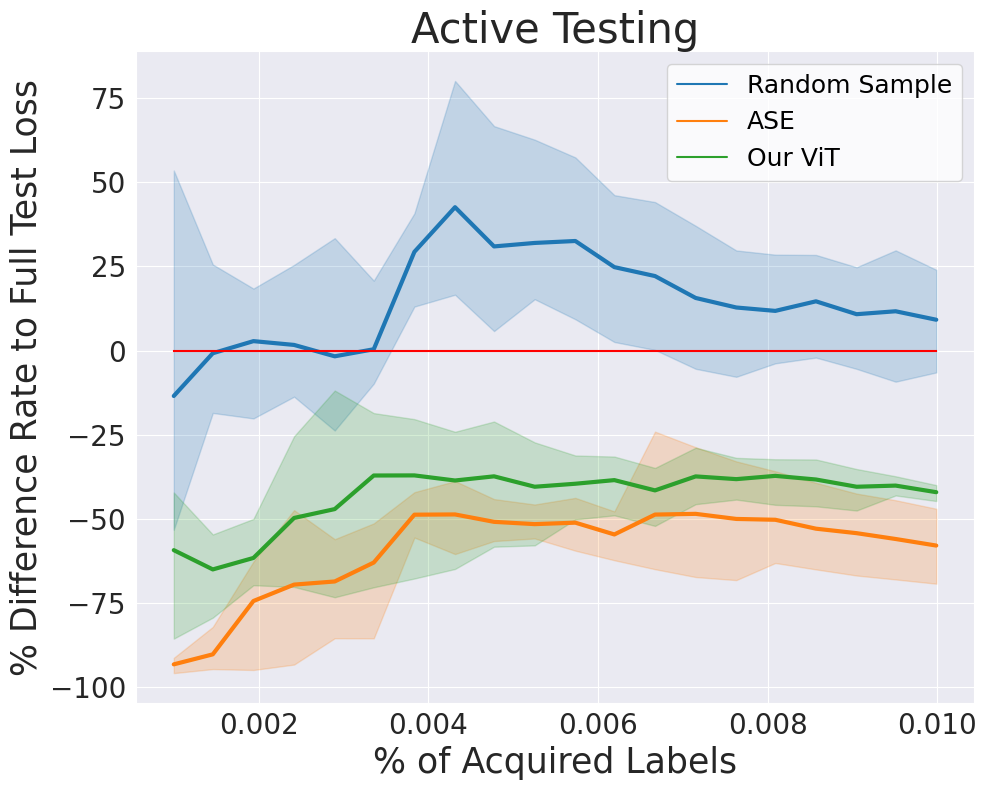

In [6]:
# 8 x 8
model_dataset = "PSPNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_8_8_true_losses.npy").shape[0]
method_dict = {"random sample": "Random Sample", "ViT": "Our ViT", "temp":"temp", "MLP": "MLP", "ordinal": "ordinal", "ASE": "ASE"}
result_json_path = f"./results/{model_dataset}/region_8_8_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_output_train_ordinal_runs.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

## Ablation Study

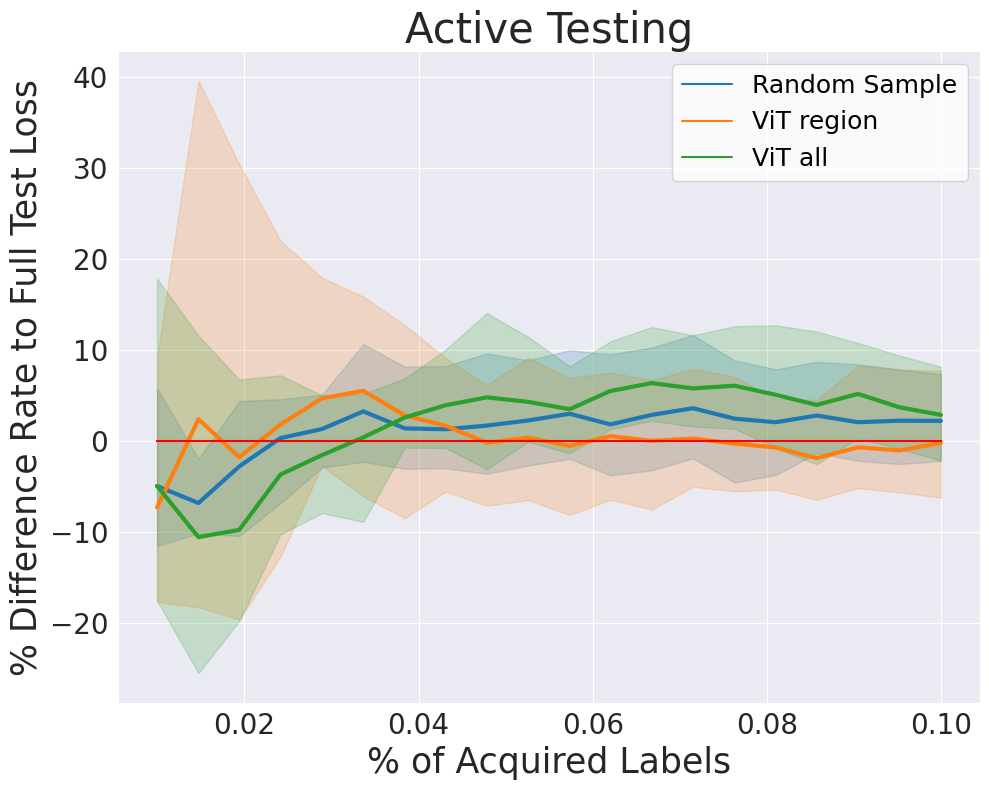

In [24]:
# 16x16,whether to train image and region 16x16 together
method_dict = {"random sample": "Random Sample", "ViT all": "ViT all", "ViT region": "ViT region", "ASE": "ASE"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ViT_range_region_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_range_all_runs_10000.json"),ignore_index=True)
# results =  results.append(add_entries(result_json_path + "ase_runs.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

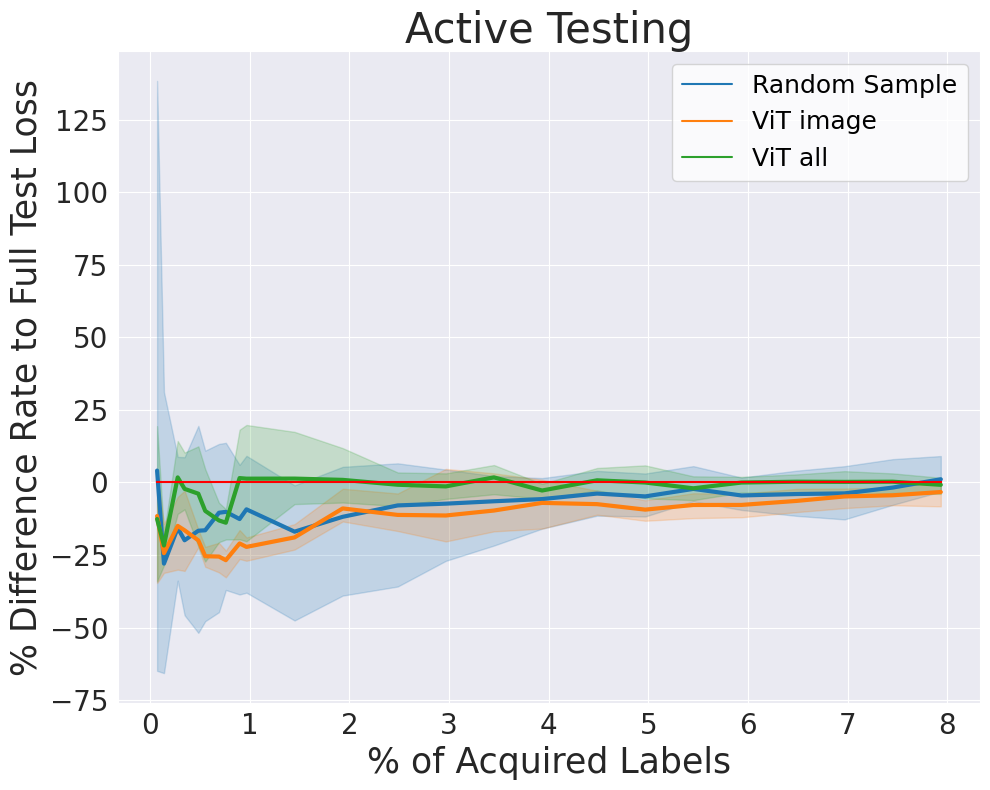

In [21]:
# image, whether to train image and region 16x16 together
method_dict = {"random sample": "Random Sample", "ViT all": "ViT all", "ViT image": "ViT image"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "image_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/image_based_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ViT_range_image_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_range_all_runs_10000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

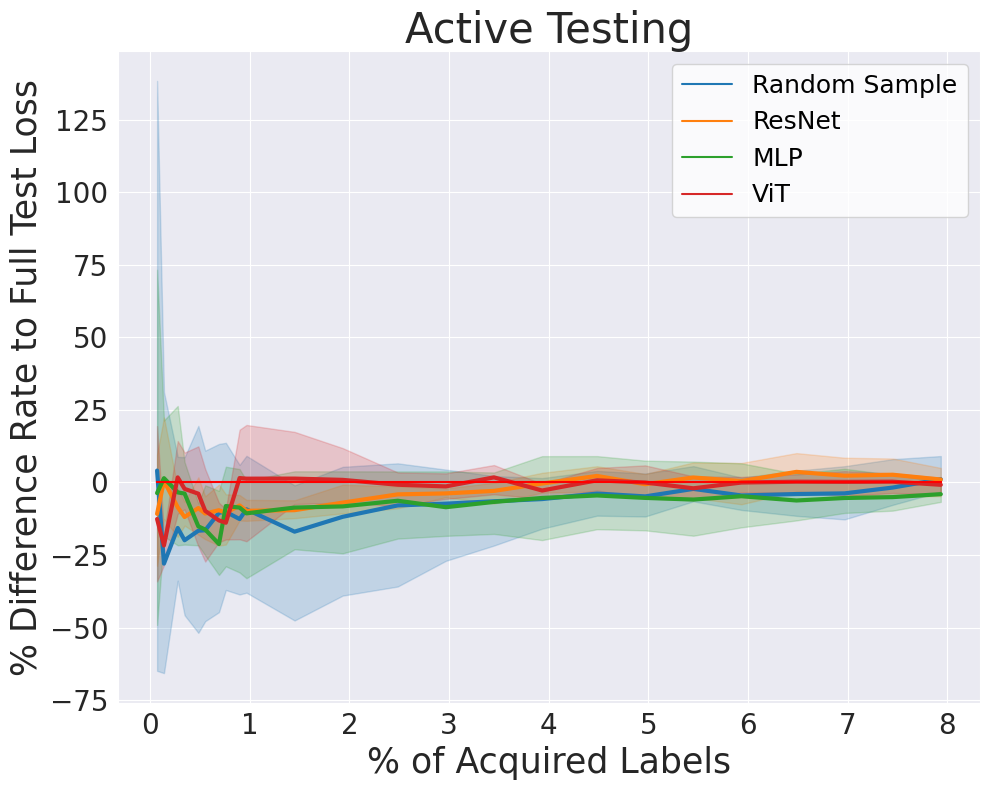

In [27]:
# image, ResNet vs ViT vs MLP
method_dict = {"random sample": "Random Sample", "ViT all": "ViT", "MLP": "MLP", "ResNet": "ResNet", "ViT reg": "ViT reg"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "image_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/image_based_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ResNet_UNet_VOC_image_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "MLP_UNet_VOC_image_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_range_all_runs_10000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

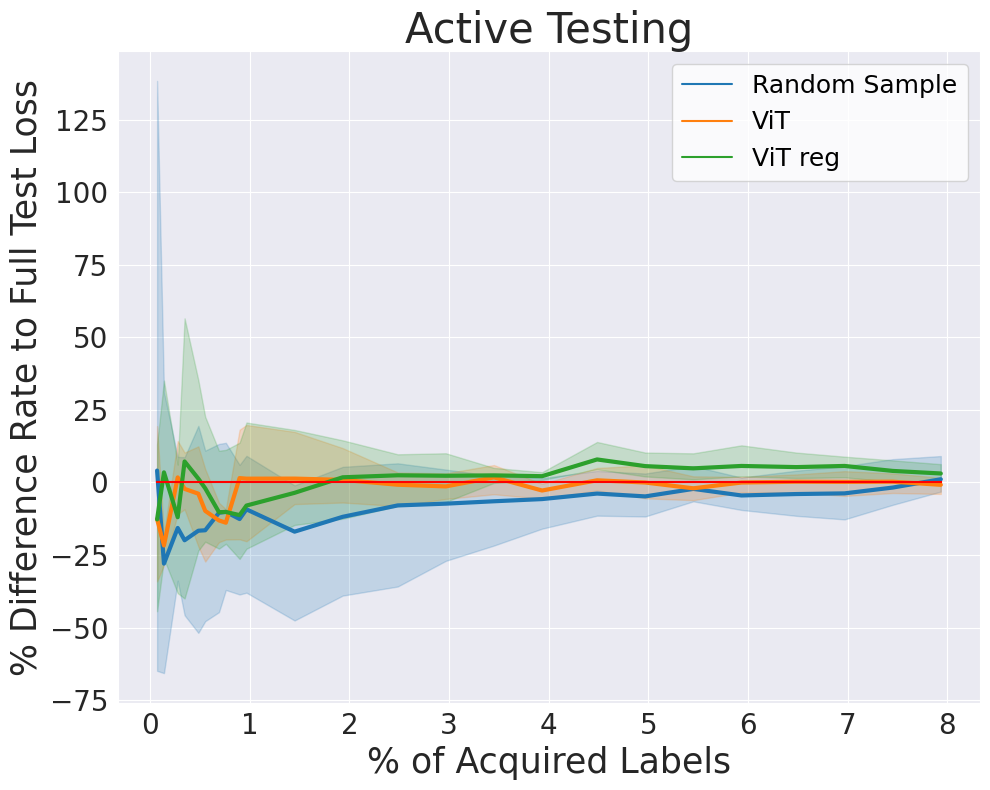

In [26]:
# image, ViT ordinal VS regression
method_dict = {"random sample": "Random Sample", "ViT all": "ViT", "MLP": "MLP", "ResNet": "ResNet", "ViT reg": "ViT reg"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "image_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/image_based_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ViT_range_all_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_regress_image_runs_20000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

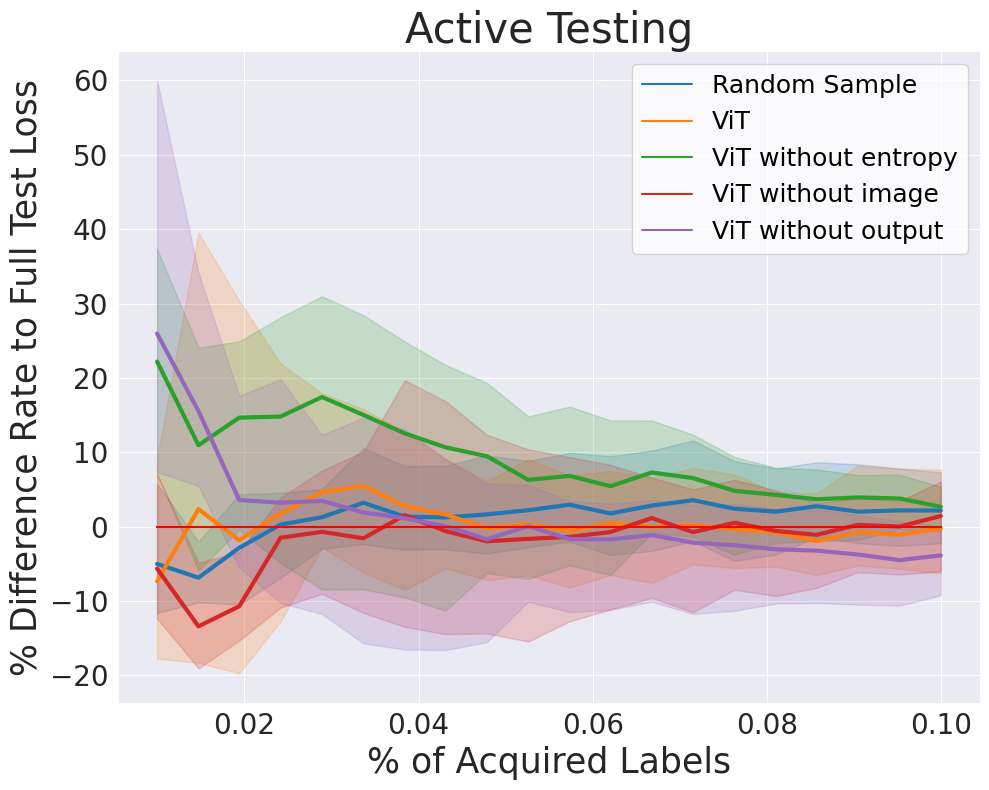

In [15]:
# 16x16, model input
method_dict = {"random sample": "Random Sample", "ViT without entropy": "ViT without entropy", "ViT without image": "ViT without image", "ViT without output": "ViT without output", "ViT region": "ViT"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")
results =  results.append(add_entries(result_json_path + "ViT_range_region_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_without_entropy_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_without_image_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_without_output_runs_10000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

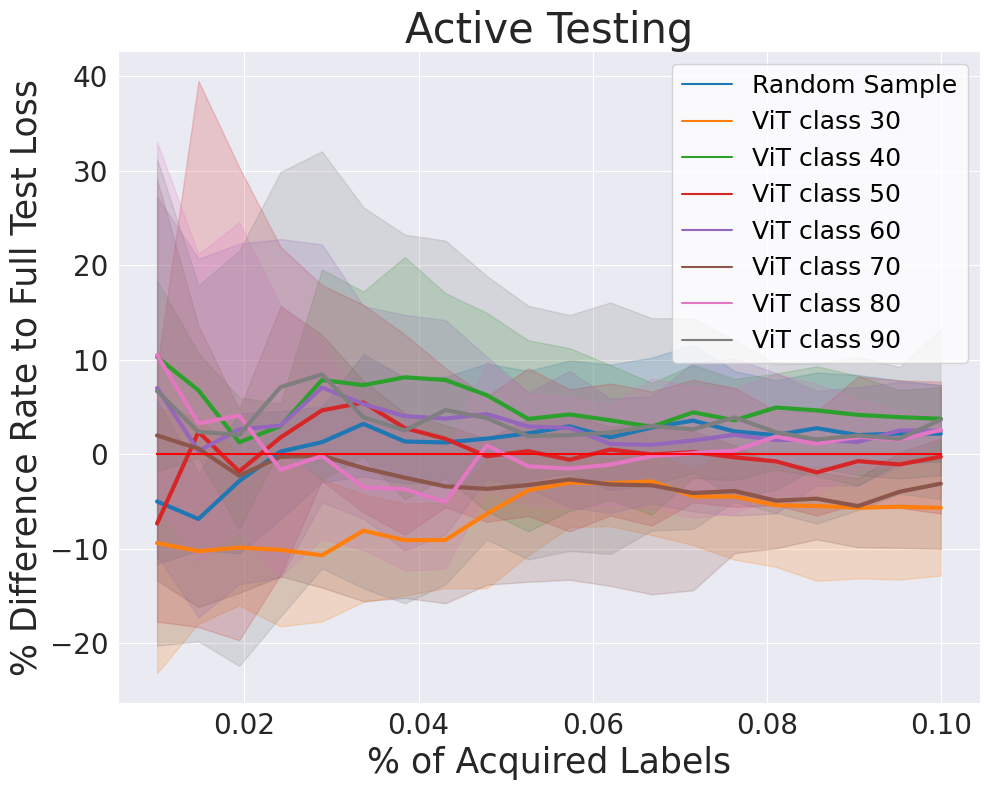

In [9]:
# 16x16, different number of ordinal class
method_dict = {"random sample": "Random Sample", "ViT region": "ViT class 50", "ViT class 30": "ViT class 30", "ViT class 40": "ViT class 40",
              "ViT class 60": "ViT class 60", "ViT class 70": "ViT class 70", "ViT class 80": "ViT class 80", "ViT class 90": "ViT class 90"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")

results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_30_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_40_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_range_region_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_60_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_70_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_80_runs_10000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_90_runs_10000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")

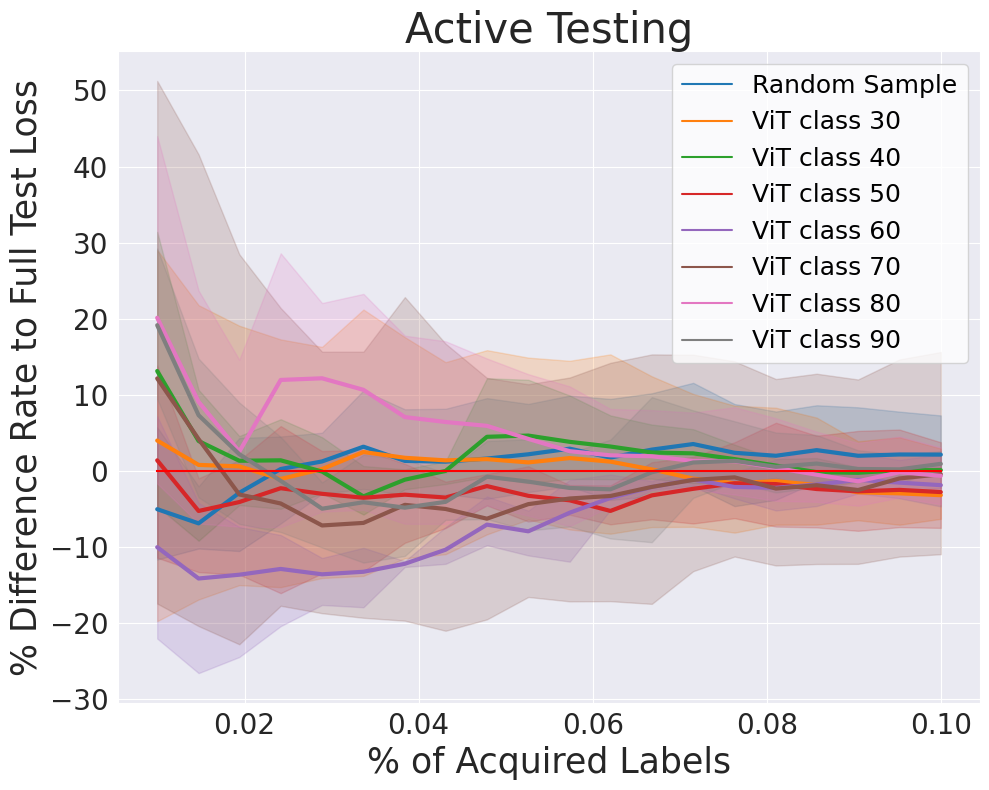

In [10]:
method_dict = {"random sample": "Random Sample", "ViT region": "ViT class 50", "ViT class 30": "ViT class 30", "ViT class 40": "ViT class 40",
              "ViT class 60": "ViT class 60", "ViT class 70": "ViT class 70", "ViT class 80": "ViT class 80", "ViT class 90": "ViT class 90"}
model_dataset = "UNet_VOC"
base_path = f"./pro_data/{model_dataset}/val/"
sample_size_threshold = np_read(base_path + "region_16_16_true_losses.npy").shape[0]
result_json_path = f"./results/{model_dataset}/region_16_16_active_testing/"
true_loss_estimation_path = result_json_path + "None.json"
test_whole_data = read_baseline_data(true_loss_estimation_path)
results = add_entries(result_json_path + "random_sample_3_runs.json")

results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_30_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_40_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_range_region_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_60_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_70_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_80_runs_20000.json"),ignore_index=True)
results =  results.append(add_entries(result_json_path + "ViT_UNet_VOC_class_90_runs_20000.json"),ignore_index=True)
plot_all_diff_precentage_figure(results, test_whole_data, sample_size_threshold, "loss", x_label_name = "% of Acquired Labels")